In [10]:
import importlib
import MissingMethods
importlib.reload(MissingMethods)

c:\Users\lfvvi\OneDrive\Escritorio\PY_Valores Faltantes\MissingMethods.py:6: UserWarning: registration of accessor <class 'MissingMethods.MissingMethods'> under name 'missing' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class MissingMethods:


<module 'MissingMethods' from 'c:\\Users\\lfvvi\\OneDrive\\Escritorio\\PY_Valores Faltantes\\MissingMethods.py'>

In [24]:
import pandas as pd
import numpy as np
import missingno

In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Se utiliza fuente alternativa
url2 = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"


import pandas as pd

# Puedes agregar nombres de columnas ya que este dataset no tiene header
columnas = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(url, names=columnas)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


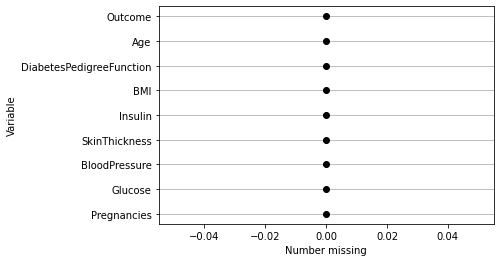

In [13]:
df.missing.missing_variable_plot()

In [21]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [26]:
df[df.columns[1:6]] = df[df.columns[1:6]].replace(0, np.nan)


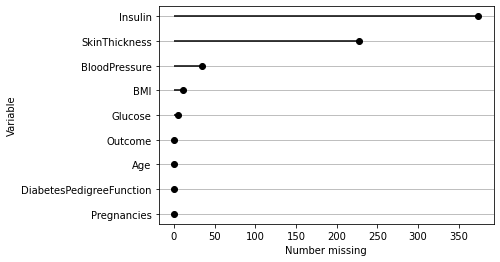

In [28]:
df.missing.missing_variable_plot()

<AxesSubplot:>

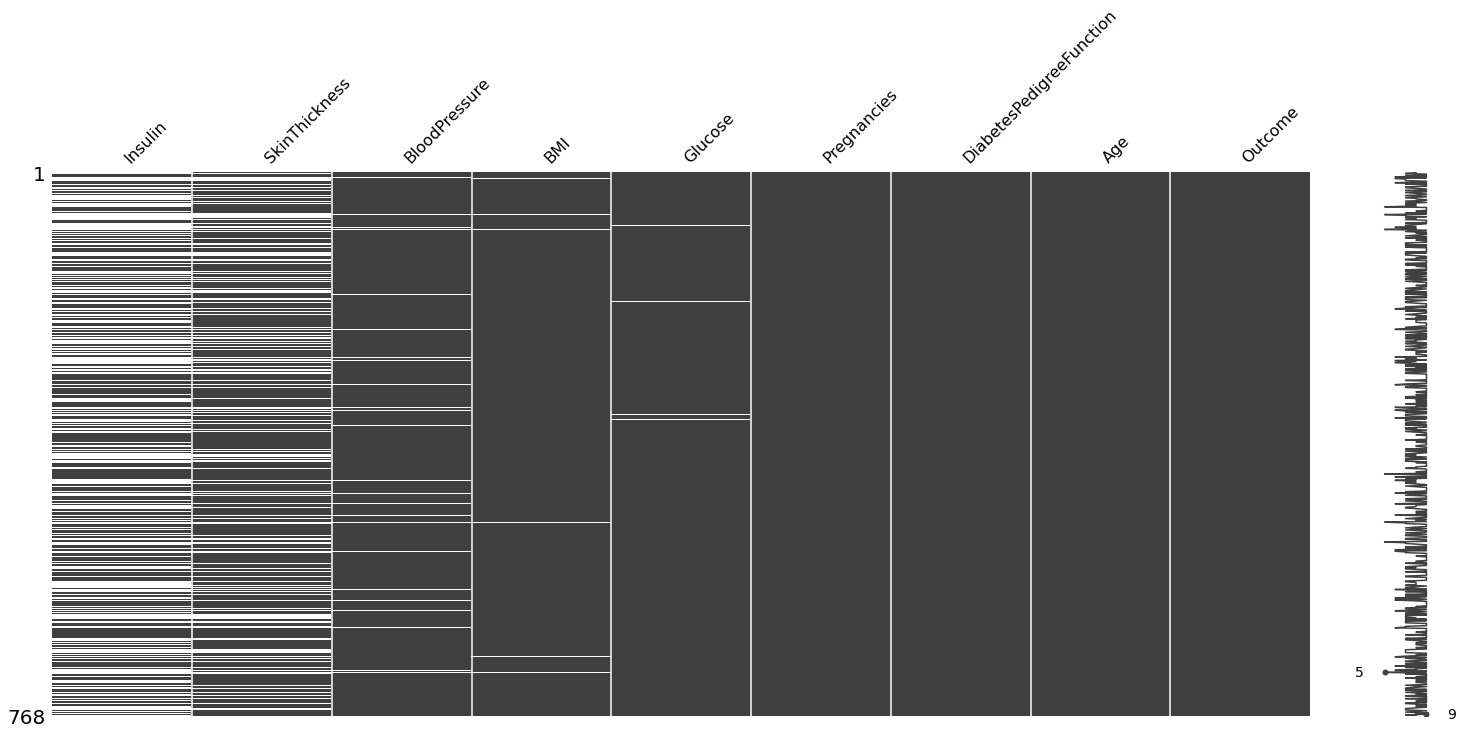

In [27]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix) # muestra los datos en una matriz de sombra
)

# Tipos de Datos Faltantes en Estadística

En el análisis de datos, entender **por qué faltan datos** es crucial para decidir cómo tratarlos. Existen tres mecanismos principales de valores faltantes:

---

## 1. MCAR - Missing Completely At Random

**Definición**:  
Los valores faltantes **no dependen** ni de los datos observados ni de los no observados. Su ausencia es completamente aleatoria.

**Ejemplo**:  
Una máquina falla al registrar datos al azar. La probabilidad de que falte un dato es la misma para todos los registros.

**Implicación**:  
Es el mejor escenario. Podemos eliminar filas con valores faltantes sin sesgar los resultados.

---

## 2. MAR - Missing At Random

**Definición**:  
La probabilidad de que falte un dato **depende de otras variables observadas**, pero **no del valor faltante en sí mismo**.

**Ejemplo**:  
En una encuesta, los ingresos pueden estar ausentes más frecuentemente en mujeres que en hombres. La ausencia depende del género (observado), pero no del ingreso (faltante).

**Implicación**:  
Se pueden usar técnicas como imputación múltiple o modelos predictivos basados en las variables observadas.

---

## 3. MNAR - Missing Not At Random

**Definición**:  
La falta de datos **depende del valor faltante en sí mismo**, incluso después de considerar otras variables observadas.

**Ejemplo**:  
Una persona con ingresos muy altos decide no revelar esa información. El hecho de no responder **depende del propio ingreso**.

**Implicación**:  
Es el caso más problemático. El sesgo no puede eliminarse fácilmente sin modelar el mecanismo que genera los faltantes.

---

## 🔍 Comparación Visual (Resumen)

| Tipo  | ¿Depende de variables observadas? | ¿Depende del valor faltante? | Fácil de manejar |
|-------|-----------------------------------|-------------------------------|------------------|
| MCAR  | ❌                                | ❌                            | ✅               |
| MAR   | ✅                                | ❌                            | ✅               |
| MNAR  | ✅ / ❌                           | ✅                            | ❌               |

---

## 🧠 Conclusión

Identificar el tipo de datos faltantes en tu conjunto es fundamental para elegir el método correcto de imputación o tratamiento. Técnicas como `KNN`, `IterativeImputer`, o `Multiple Imputation` asumen MAR o MCAR, pero **no funcionan bien bajo MNAR** si no se ajusta el modelo.